#Graded Challenge 1

Monica M. Pratiwi (FTDS016)

##Description
Kemunculan kasus coronavirus disease 2019 (COVID-19) pertama yang terkonfirmasi di Australia pada awal tahun 2020 dan penyebarannya yang sangat cepat menyebabkan pemerintah Australia memutuskan untuk menutup perbatasan negaranya pada 20 Maret 2020. Australia merupakan salah satu negara yang menerapkan protokol pembatasan kegiatan masyarakat yang ketat untuk menekan penyebaran COVID-19. Salah satu caranya dalah dengan memberlakukan *lockdown*, yang ketentuannya diatur oleh masing-masing negara bagian. Setelah hampir dua tahun, pada tanggal 21 Februari 2022, Australia kembali membuka perbatasan internasionalnya.


**Objectives**

Mengetahui situasi COVID-19 di Australia sebelum, selama, dan setelah penutupan perbatasan negaranya.

**Problem Statement**

Bagaimana situasi COVID-19 di Australia sebelum, selama, dan setelah penutupan perbatasan negaranya?




##Working Area

###Library

Terdapat beberapa *library* yang digunakan dalam menyelesaikan pekerjaan ini. Semua *library* yang dipasang untuk proses visualisasi data. Diperlukan instalasi Geopandas, Shapely, dan Contextily untuk mengolah informasi berupa koordinat lokasi yang terdiri atas data *latitude* dan *longitude*. Instalasi matplotlib digunakan untuk mengolah informasi angka.

In [2]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 2.1 MB/s 
     |████████████████████████████████| 16.7 MB 50.5 MB/s 
     |████████████████████████████████| 6.3 MB 45.0 MB/s 


In [3]:
pip install shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install contextily

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 1.5 MB/s 
     |████████████████████████████████| 19.3 MB 40.4 MB/s 


In [5]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Setelah melakukan install, langkah selanjutnya adalah melakukan import ke dalam Phyton dengan langkah berikut.

In [6]:
import numpy as np
import pandas as pd

In [7]:
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

In [9]:
import geopandas as gpd

In [10]:
from google.colab import files

In [11]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import contextily as ctx

###Data Loading

*Project* ini memerlukan data yang dapat diakses melalui bigquery-public-data pada Google Cloud Big Query. Dalam *project* ini, data diperoleh dari tabel "summary" yang terdapat di database 'covid19_jhu_csse_eu' dan perlu dilakukan proses *query* agar mendapatkan hasil yang sesuai. 

In [ ]:
select *
from `bigquery-public-data.covid19_jhu_csse_eu.summary`
where country_region = "Australia"
order by date

*Query* yang sudah berhasil dijalankan kemudian menghasilkan sebuah dataset. Dataset kemudian disimpan ke dalam bentuk csv di Google Drive lalu di-*download* ke penyimpanan di komputer.

Data yang sudah tersimpan di komputer selanjutnya dimuat ke dalam Google Colab dengan menggunakan files.upload().

In [12]:
uploaded = files.upload()

Saving h8dsft_P0GC1_Monica-Pratiwi.csv to h8dsft_P0GC1_Monica-Pratiwi.csv


Gunakan .read_csv() agar file dapat terbaca di dataset dan tersimpan sebagai DataFrame.

In [13]:
df = pd.read_csv('h8dsft_P0GC1_Monica-Pratiwi.csv')

Setelah data csv sudah terbaca, dapat dilakukan eksplorasi sedikit terhadap data yang sudah diperoleh. Fungsi df.shape digunakan untuk melihat jumlah baris dan kolom pada DataFrame.

In [ ]:
df.shape

(7748, 13)

Diketahui terdapat 7748 baris dan 13 kolom pada DataFrame. Selanjutnya, akan dilakukan pemeriksaan bagian awal dan akhir tabel. Fungsi df.head() untuk judul kolom dan lima baris awal, sementara df.tail() untuk lima baris akhir. 

In [ ]:
df.head()

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
0,NaN,Australia,2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Australia,2020-01-25,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Australia,2020-01-26,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
3,New South Wales,Australia,2020-01-27,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Victoria,Australia,2020-01-27,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.tail()

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
7743,Queensland,Australia,2022-10-06,-27.4698,153.0251,POINT(153.0251 -27.4698),1649359.0,2229.0,NaN,NaN,NaN,NaN,"Queensland, Australia"
7744,South Australia,Australia,2022-10-06,-34.9285,138.6007,POINT(138.6007 -34.9285),771681.0,1027.0,NaN,NaN,NaN,NaN,"South Australia, Australia"
7745,Tasmania,Australia,2022-10-06,-42.8821,147.3272,POINT(147.3272 -42.8821),250332.0,187.0,NaN,NaN,NaN,NaN,"Tasmania, Australia"
7746,Victoria,Australia,2022-10-06,-37.8136,144.9631,POINT(144.9631 -37.8136),2622436.0,5664.0,NaN,NaN,NaN,NaN,"Victoria, Australia"
7747,Western Australia,Australia,2022-10-06,-31.9505,115.8605,POINT(115.8605 -31.9505),1159261.0,669.0,NaN,NaN,NaN,NaN,"Western Australia, Australia"


Untuk melihat wujud dari DataFrame dapat menggunakan df. Data yang perlu dimuat terlalu banyak yaitu 7748 baris sehingga hanya judul kolom, 5 baris awal, dan 5 baris akhir yang dapat ditampilkan.

In [14]:
df

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
0,NaN,Australia,2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Australia,2020-01-25,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Australia,2020-01-26,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
3,New South Wales,Australia,2020-01-27,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Victoria,Australia,2020-01-27,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7743,Queensland,Australia,2022-10-06,-27.4698,153.0251,POINT(153.0251 -27.4698),1649359.0,2229.0,NaN,NaN,NaN,NaN,"Queensland, Australia"
7744,South Australia,Australia,2022-10-06,-34.9285,138.6007,POINT(138.6007 -34.9285),771681.0,1027.0,NaN,NaN,NaN,NaN,"South Australia, Australia"
7745,Tasmania,Australia,2022-10-06,-42.8821,147.3272,POINT(147.3272 -42.8821),250332.0,187.0,NaN,NaN,NaN,NaN,"Tasmania, Australia"
7746,Victoria,Australia,2022-10-06,-37.8136,144.9631,POINT(144.9631 -37.8136),2622436.0,5664.0,NaN,NaN,NaN,NaN,"Victoria, Australia"


Setelah diperhatikan, ternyata terdapat data yang kosong pada kolom "recovered", "active", "fips", dan "admin2". Perlu dipastikan kembali apakah seluruh data pada kolom-kolom tersebut memang kosong atau ada yang terisi namun tidak terlihat. Gunakan .loc lalu pilih baris yang ingin dituju dan kolom yang ingin diperiksa. 

In [15]:
df.loc[1250:1260, ["recovered", "active", "fips", "admin2"]]

,recovered,active,fips,admin2
1250,2669.0,2464.0,NaN,NaN
1251,610.0,27.0,NaN,NaN
1252,105.0,5.0,NaN,NaN
1253,2988.0,513.0,NaN,NaN
1254,29.0,2.0,NaN,NaN
1255,1059.0,6.0,NaN,NaN
1256,440.0,0.0,NaN,NaN
1257,215.0,0.0,NaN,NaN
1258,2709.0,2610.0,NaN,NaN
1259,617.0,25.0,NaN,NaN


Ternyata kolom "recovered" dan "active" pada baris ke 1250 sampai dengan baris ke 1260 terisi, namun tidak dengan kolom "fips" dan "admin2".

###Menghapus kolom yang tidak digunakan

Membuat salinan dataframe. Salinan dari data frame adalah "au". 

In [16]:
au = df.copy()

Setelah disalin, dilakukan pemeriksaan baris dan kolom untuk au.

In [17]:
[au.shape]

[(7748, 13)]

Selanjutnya, kolom-kolom yang tidak terpakai dalam proses pengolahan data akan. Kolom-kolom tersebut adalah "fips", "admin", "combined_key". Ketiga kolom dikelompokkan menjadi "unused_column". Selanjutnya, dilakukan .drop terhadap "unused_columns"

In [18]:
unused_columns = ["fips", "admin2", "combined_key"]

In [19]:
au.drop(unused_columns, inplace=True, axis=1)

Setelah dilakukan pengecekan baris dan kolom kembali, jumlah kolom sudah berubah.

In [20]:
au.shape

(7748, 10)

###Memberi nama baru untuk kolom

Dua kolom yang akan diberi nama baru adalah "province_state" dan "country_region". Kolom diberi nama baru menggunakan .rename()

In [21]:
au.rename({"province_state": "State", "country_region": "Country"}, axis=1, inplace=True)


In [22]:
au

,State,Country,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active
0,NaN,Australia,2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Australia,2020-01-25,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,NaN,Australia,2020-01-26,NaN,NaN,NaN,4.0,NaN,NaN,NaN
3,New South Wales,Australia,2020-01-27,NaN,NaN,NaN,4.0,NaN,NaN,NaN
4,Victoria,Australia,2020-01-27,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7743,Queensland,Australia,2022-10-06,-27.4698,153.0251,POINT(153.0251 -27.4698),1649359.0,2229.0,NaN,NaN
7744,South Australia,Australia,2022-10-06,-34.9285,138.6007,POINT(138.6007 -34.9285),771681.0,1027.0,NaN,NaN
7745,Tasmania,Australia,2022-10-06,-42.8821,147.3272,POINT(147.3272 -42.8821),250332.0,187.0,NaN,NaN
7746,Victoria,Australia,2022-10-06,-37.8136,144.9631,POINT(144.9631 -37.8136),2622436.0,5664.0,NaN,NaN


###Specifying Data Types

Pemeriksaan tipe data diperlukan untuk mengetahui bagaimana sebaiknya pengolahan data dilakukan. 

In [24]:
au.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7748 entries, 0 to 7747
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          7745 non-null   object 
 1   Country        7748 non-null   object 
 2   date           7748 non-null   object 
 3   latitude       7605 non-null   float64
 4   longitude      7605 non-null   float64
 5   location_geom  7605 non-null   object 
 6   confirmed      7747 non-null   float64
 7   deaths         7733 non-null   float64
 8   recovered      4311 non-null   float64
 9   active         4003 non-null   float64
dtypes: float64(6), object(4)
memory usage: 605.4+ KB


Ada data yang memiliki tipe object dan float. Kolom dengan tipe data float memiliki jumlah data null yang cukup banyak. Kolom-kolom bertipe data object juga ada yang tidak memiliki nilai. Hanya data pada kolom "State" dan "date" yang seluruhnya terisi. Kolom "latitude", "longitude" dan "location_geom" memiliki jumlah data null yang sama.



###Missing Values

Salah satu kolom dengan nilai null paling banyak adalah kolom "recovered". `isna()` di *library* pandas dapat digunakan untuk memeriksa apabila suatu nilai adalah null/NaN. Jika nilai data tersebut adalah benar NaN/null maka hasilnya akan muncul True.

In [26]:
# Looking at the recovered column
print(au['recovered'])
print(au['recovered'].isnull())

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
7743   NaN
7744   NaN
7745   NaN
7746   NaN
7747   NaN
Name: recovered, Length: 7748, dtype: float64
0       True
1       True
2       True
3       True
4       True
        ... 
7743    True
7744    True
7745    True
7746    True
7747    True
Name: recovered, Length: 7748, dtype: bool


Dengan menggunakan `isnull()`, dapat diketahui bahwa nilai "NaN" benar dikenali sebagai sebuah *missing values* berdasarkan hasil dari boolean yang menampilkan respon True. 


Untuk data-data float lainnya dapat diperiksa dengan cara berikut.

In [27]:
x = float("nan")
print(f"{pd.isna(x)}")

True


Arti dari NaN adalah Not A Number dan merupakan satu dari berbagai cara untuk meuliskan nilai yang hilang atau kosong. Data ini memiliki tipe data float yang tidak dapat diubah ke dalam bentuk apapun.

###Checking Invalid Values

Untuk mengecek nilai yang invalid, hal pertama yang dilakukan adalah memeriksa rentang data menggunakan` .describe()`

In [ ]:
au.describe()

,latitude,longitude,confirmed,deaths,recovered,active
count,7605.000000,7605.000000,7.747000e+03,7733.000000,4311.000000,4003.000000
mean,-31.918521,141.339492,2.359286e+05,381.161128,2191.322199,441.593305
std,9.195781,11.762604,6.086255e+05,941.926754,5176.646491,1351.238777
min,-42.882100,115.860500,0.000000e+00,0.000000,0.000000,-20.000000
25%,-35.473500,138.600700,2.340000e+02,4.000000,106.000000,1.000000
50%,-33.868800,144.963100,1.331000e+03,13.000000,436.000000,9.000000
75%,-28.016700,149.012400,7.504700e+04,136.000000,1153.000000,52.000000
max,35.443700,153.400000,3.518633e+06,5706.000000,20061.000000,9987.000000


nilai minimal active case adalah -20.000000. Perlu dilihat di mana persisnya posisi data tersebut.

In [ ]:
au[au["active"] == -20.000000]

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active
1379,Western Australia,Australia,2020-08-01,-31.9505,115.8605,POINT(115.8605 -31.9505),641.0,9.0,652.0,-20.0


Kasus aktif merupakan data akmulasi per harinya yang tidak bisa berbentuk negatif karena menujukkan jumlah orang yang hanya dapat dinyatakan dalam bentuk negatif. Namun, karena pada baris yang sama terdapat data-data yang bisa digunakan, diputuskan untuk tidak menghapus baris tersebut.

###Data Processing and Visualization
Berikut merupakan tabel untuk data yang akan diolah lebih lanjut.


In [28]:
au

,State,Country,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active
0,NaN,Australia,2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Australia,2020-01-25,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,NaN,Australia,2020-01-26,NaN,NaN,NaN,4.0,NaN,NaN,NaN
3,New South Wales,Australia,2020-01-27,NaN,NaN,NaN,4.0,NaN,NaN,NaN
4,Victoria,Australia,2020-01-27,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7743,Queensland,Australia,2022-10-06,-27.4698,153.0251,POINT(153.0251 -27.4698),1649359.0,2229.0,NaN,NaN
7744,South Australia,Australia,2022-10-06,-34.9285,138.6007,POINT(138.6007 -34.9285),771681.0,1027.0,NaN,NaN
7745,Tasmania,Australia,2022-10-06,-42.8821,147.3272,POINT(147.3272 -42.8821),250332.0,187.0,NaN,NaN
7746,Victoria,Australia,2022-10-06,-37.8136,144.9631,POINT(144.9631 -37.8136),2622436.0,5664.0,NaN,NaN


**Lokasi Pengumpulan Data**

Hal pertama adalah lokasi dari pengumpulan Data Covid-19 di Australia. Berikut merupakan proses *plotting* dari titik lokasi pengumpulan data COVID-19 di Australia ke dalam grafik. 

Data yang digunakan adalah data "latitude" dan "longitude" yang kemudian diubah menjadi geodataframe menggunakan geopanda (`gpd.GeoDataFrame()`) dengan CRS (Coordinate Reference System) WGS-84.

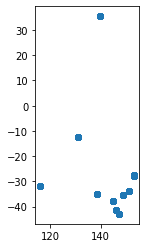

In [29]:
gdf = gpd.GeoDataFrame(
    au, geometry=gpd.points_from_xy(au.longitude, au.latitude, crs="WGS84"))
ax = gdf.plot()

Data pada grafik di atas dapat dilakukan plotting kembali ke dalam peta dunia sederhana yang tersedia di geopandas. Hasilnya adalah sebagai berikut.

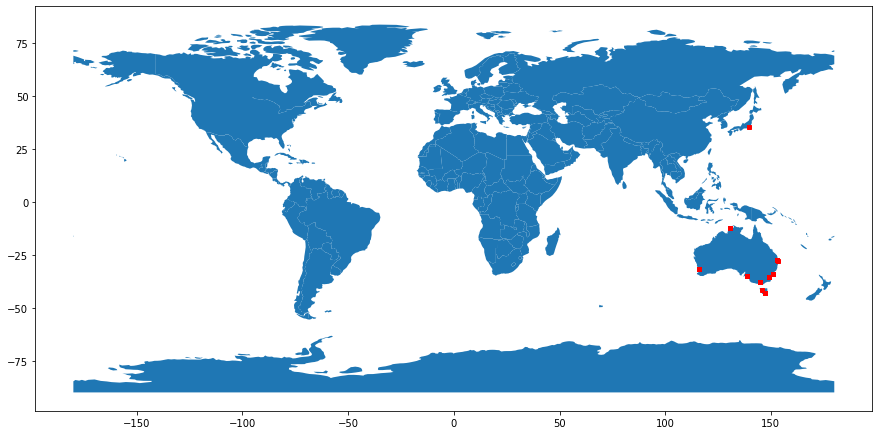

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(15, 15)), marker='o', color='red', markersize=15);

Titik merah merupakan sebaran lokasi pengumpulan data. Berdasarkan peta tersebut, terlihat bahwa hampir seluruh titik berada di wilayah Australia dan tersebar di setiap negara bagian. Namun terdapat satu titik yang berada di luar Australia yaitu di Jepang.

Analisis lebih lanjut dilakukan, kali ini dengan mengelompokkan "province_state" dengan "location_geom" menggunakan `.groupby()` untuk mendapatkan gambaran lokasi pengumpulan data di setiap negara bagian.

In [31]:
au.groupby(["State", "location_geom"]).size()

State                         location_geom           
Australian Capital Territory  POINT(149.0124 -35.4735)    938
From Diamond Princess         POINT(139.638 35.4437)       21
New South Wales               POINT(151.2093 -33.8688)    950
Northern Territory            POINT(130.8456 -12.4634)    947
Queensland                    POINT(153.0251 -27.4698)    929
                              POINT(153.4 -28.0167)        21
South Australia               POINT(138.6007 -34.9285)    950
Tasmania                      POINT(145.9707 -41.4545)     20
                              POINT(147.3272 -42.8821)    929
Victoria                      POINT(144.9631 -37.8136)    950
Western Australia             POINT(115.8605 -31.9505)    950
dtype: int64

Berdasarkan daftar di atas, negara bagian Queensland dan Tasmania merupakan wilayah dengan dua titik pengumpulan data. Selain negara bagian dan wilayah teritorial ibukota, terdapat satu nama lagi yaitu "From Diamond Princess" yang jika dicocokkan berdasarkan "location_geom" nya sesuai dengan titik lokasi yang berada di Jepang.

Diamond Princess merupakan nama sebuah kapal pesiar yang mendeteksi adanya kasus terkonfirmasi COVID-19 di dalam kapal saat sedang melakukan perjalanan ke pasifik barat. Kapal itu dikarantina di Jepang selama dua minggu dan terdapat banyak warga negara Australia yang mengikuti perjalanan di kapal tersebut. 

**Tahun 2020**

Untuk mengetahui gambaran situasi awal COVID-19 dapat diperoleh dengan cara berikut. Pemerintah Australia mengumumkan penutupan batas internasional negaranya pada tanggal 20 Maret 2020 sehingga data yang dipanggil adalan data sebelum tanggal 21 Maret 2020.



In [39]:
au[
    (au ["date"] < "2020-03-21")
    
]

,State,Country,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,geometry
0,NaN,Australia,2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT EMPTY
1,NaN,Australia,2020-01-25,NaN,NaN,NaN,4.0,NaN,NaN,NaN,POINT EMPTY
2,NaN,Australia,2020-01-26,NaN,NaN,NaN,4.0,NaN,NaN,NaN,POINT EMPTY
3,New South Wales,Australia,2020-01-27,NaN,NaN,NaN,4.0,NaN,NaN,NaN,POINT EMPTY
4,Victoria,Australia,2020-01-27,NaN,NaN,NaN,1.0,NaN,NaN,NaN,POINT EMPTY
...,...,...,...,...,...,...,...,...,...,...,...
300,South Australia,Australia,2020-03-20,-34.9285,138.6007,POINT(138.6007 -34.9285),50.0,0.0,3.0,NaN,POINT (138.60070 -34.92850)
301,Tasmania,Australia,2020-03-20,-41.4545,145.9707,POINT(145.9707 -41.4545),10.0,0.0,3.0,NaN,POINT (145.97070 -41.45450)
302,Australian Capital Territory,Australia,2020-03-20,-35.4735,149.0124,POINT(149.0124 -35.4735),6.0,0.0,0.0,NaN,POINT (149.01240 -35.47350)
303,Northern Territory,Australia,2020-03-20,-12.4634,130.8456,POINT(130.8456 -12.4634),3.0,0.0,0.0,NaN,POINT (130.84560 -12.46340)


Tanggal 25 Januari 2020 merupakan kasus terkonfirmasi COVID-19 pertama yang tercatat. Tidak diketahui lokasi persisnya, namun ditambahkan ke dalam data karena angka yang dikumpulkan merupakan angka akumulasi kasus per hari. Setelah tanggal 26 Januari, pencatatan terus dilakukan. 

Di bawah ini merupakan laporan pencatatan pertama dari setiap negara bagian. Data keseluruhan dikelompokkan berdasarkan negara bagian dan dilaukan aggregating menggunakan `min()`.

In [40]:
au.groupby("State").min()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  """Entry point for launching an IPython kernel.


,Country,date,latitude,longitude,confirmed,deaths,recovered,active
State,,,,,,,,
Australian Capital Territory,Australia,2020-03-13,-35.4735,149.0124,1.0,0.0,0.0,0.0
External territories,Australia,2020-03-22,NaN,NaN,0.0,0.0,0.0,0.0
From Diamond Princess,Australia,2020-02-21,35.4437,139.6380,0.0,0.0,0.0,NaN
Jervis Bay Territory,Australia,2020-03-22,NaN,NaN,0.0,0.0,0.0,0.0
New South Wales,Australia,2020-01-27,-33.8688,151.2093,4.0,0.0,0.0,308.0
Northern Territory,Australia,2020-03-04,-12.4634,130.8456,0.0,0.0,0.0,0.0
Queensland,Australia,2020-01-30,-28.0167,153.0251,2.0,0.0,0.0,1.0
South Australia,Australia,2020-02-01,-34.9285,138.6007,1.0,0.0,0.0,0.0
Tasmania,Australia,2020-03-02,-42.8821,145.9707,1.0,0.0,0.0,0.0


Untuk memperoleh gambaran *timeline* COVID-19 di Australia pada 2020, dibuat grafik dengan berfokus pada angka kematian ("`deaths`") dan terkonfirmasi ("`confirmed`") karena kedua angka tersebut merupakan angka yang berusaha ditekan pertumbuhannya. Kedua angka tersebut dikelompokkan dengan tanggal ("`date`") sehingga dapat terlihat perbandingannya dalam waktu yang sama.


Text(0.5, 1.0, 'Confirmed and Death Cases of COVID-19 2020')

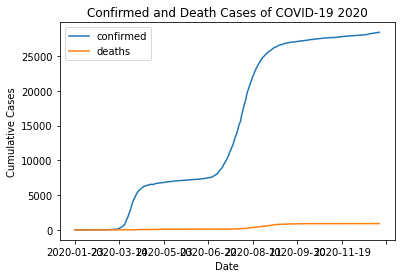

In [ ]:
au[au["date"] < "2021-01-01"].groupby("date")["confirmed"].sum().plot()
au[au["date"] < "2021-01-01"].groupby("date")["deaths"].sum().plot()
plt.legend()
plt.xlabel("Date")
plt.ylabel("Cumulative Cases")
plt.title("Confirmed and Death Cases of COVID-19 2020")

Ketentuan *lockdown* di Australia diatur sesuai dengan kebijakan dari tiap-tiap negara bagian. Selain pembatasan kegiatan masyarakat, pelacakan dan pemeriksaan turut digencarkan. Dapat terlihat tingginya angka kasus terkonfirmasi (label `confirmed` pada grafik) serta angka kematian yang jauh lebih rendah (label `deaths` pada grafik).



**Pertengahan Tahun 2020 s.d. 2021**

Pembuatan grafik dilakukan untuk melakukan visualisasi terhadap kasus kematian akibat COVID-19 di Australia Tahun 2020 s.d. 2021. 

Text(0.5, 1.0, 'Death Cases of COVID-19 2020-2021')

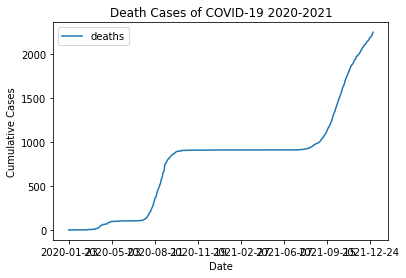

In [30]:
au[au["date"] < "2022-01-01"].groupby("date")["deaths"].sum().plot()
plt.legend()
plt.xlabel("Date")
plt.ylabel("Cumulative Cases")
plt.title("Death Cases of COVID-19 2020-2021")

Angka kematian pada sekitar bulan Mei tahun 2020 meningkat namun tidak menunjukkan pelonjakan tajam hingga sekitar bulan Agustus s.d. Oktober ketika Australia mengalami gelombang peningkatan kasus COVID-19. Setelah itu, tampak tidak ada penambahan kasus kematian hingga bulan Juni 2021.

Pada tahun 2021 terjadi beberapa hal penting yang berkaitan dengan kasus COVID-19 di Australia. Program vaksinasi dimulai pada 21 Februari 2021. Namun beberapa bulan setelahnya ditemukan kasus dengan varian Delta dengan penyebaran yang lebih cepat dan juga kembali meningkatnya angka kematian sampai dengan akhir tahun 2021. Dilakukan pengelompokkan untuk nilai tertinggi dari kasus aktif yang mencapai lebih dari 1000 di Australia. 

In [35]:
au[
    (au["Country"] == "Australia") &
    (au["active"] > 1000)
].groupby(["State"]).max()

,Country,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active
State,,,,,,,,,
New South Wales,Australia,2021-08-04,-33.8688,151.2093,POINT(151.2093 -33.8688),10063.0,76.0,3263.0,9987.0
Victoria,Australia,2020-09-16,-37.8136,144.9631,POINT(144.9631 -37.8136),19970.0,745.0,18217.0,8490.0


Victoria dan New South Wales memiliki riwayat kasus aktif tertinggi. Negara bagian Victoria merekam kasus aktif tertinggi mereka yaitu sebanyak 8490 kasus pada tanggal 16 September 2020, ketika terjadi gelombang *outbreak*. Sementara untuk New South Wales, tercatat kasus aktif tertinggi mereka yaitu sebanyak 9987 kasus pada 4 Agustus 2021, ketika varian Delta menyebabkan *outbreak* lainnya.

Setelah melihat negara dengan kasus aktif terbanyak, perlu dilihat juga negara bagian dengan kasus aktif yang sedikit ketika terjadi *outbreak*. Dilakukan pemanggilan *query* untuk memanggil data negara bagian dengan awalan "Ta-" dengan angka kematian akibat COVID-19 yang rendah dan memiliki nilai untuk data kesembuhan (tidak null).

In [41]:
au[
    (au["deaths"] < 15) &
    (au["State"].str.startswith("Ta")) &
    (au["date"] > "2021-07-21") &
    (au["recovered"].notnull())
    
]

,State,Country,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active
4217,Tasmania,Australia,2021-07-22,-42.8821,147.3272,POINT(147.3272 -42.8821),234.0,13.0,221.0,0.0
4225,Tasmania,Australia,2021-07-23,-42.8821,147.3272,POINT(147.3272 -42.8821),234.0,13.0,221.0,0.0
4233,Tasmania,Australia,2021-07-24,-42.8821,147.3272,POINT(147.3272 -42.8821),234.0,13.0,221.0,0.0
4241,Tasmania,Australia,2021-07-25,-42.8821,147.3272,POINT(147.3272 -42.8821),234.0,13.0,221.0,0.0
4249,Tasmania,Australia,2021-07-26,-42.8821,147.3272,POINT(147.3272 -42.8821),234.0,13.0,221.0,0.0
4257,Tasmania,Australia,2021-07-27,-42.8821,147.3272,POINT(147.3272 -42.8821),234.0,13.0,221.0,0.0
4265,Tasmania,Australia,2021-07-28,-42.8821,147.3272,POINT(147.3272 -42.8821),234.0,13.0,221.0,0.0
4273,Tasmania,Australia,2021-07-29,-42.8821,147.3272,POINT(147.3272 -42.8821),234.0,13.0,221.0,0.0
4281,Tasmania,Australia,2021-07-30,-42.8821,147.3272,POINT(147.3272 -42.8821),234.0,13.0,221.0,0.0
4289,Tasmania,Australia,2021-07-31,-42.8821,147.3272,POINT(147.3272 -42.8821),234.0,13.0,221.0,0.0


Negara bagian Tasmania merupakan negara bagian dengan luas dan kepadatan penduduk terkecil di Australia. Tasmania hanya memiliki satu kasus aktif dari tanggal 22 Juli hingga 4 Agustus 2021, menjadikan jumlah kasus terkonfirmasi bertambah menjadi 235. Pada jarak waktu tersebut, Tasmania mencatat 13 kasus kematian dan 221 kasus yang sembuh. 

**Tahun 2022**

Australia membuka kembali negara mereka untuk pengunjung internasional pada 21 Februari 2022 dan sebagian besar penduduk Australia sudah divaksin. Pada awal tahun 2022 kembali muncul varian baru Omicron namun tidak membuat Australia kembali menutup perbatasannya.

Dilakukan pemanggilan data untuk jumlah kasus di setiap negara bagian pada tanggal 7 April 2022, yaitu beberapa bulan setelah Australia kembali membuka perbatasan internasional.

In [45]:
au[
    (au["Country"] == "Australia") &
    (au["date"] > "2022-04-06")].sort_values(by=["date"])

,State,Country,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active
6284,Australian Capital Territory,Australia,2022-04-07,-35.4735,149.0124,POINT(149.0124 -35.4735),85177.0,44.0,NaN,NaN
6285,New South Wales,Australia,2022-04-07,-33.8688,151.2093,POINT(151.2093 -33.8688),1981387.0,2511.0,NaN,NaN
6286,Northern Territory,Australia,2022-04-07,-12.4634,130.8456,POINT(130.8456 -12.4634),53364.0,36.0,NaN,NaN
6287,Queensland,Australia,2022-04-07,-27.4698,153.0251,POINT(153.0251 -27.4698),841085.0,772.0,NaN,NaN
6288,South Australia,Australia,2022-04-07,-34.9285,138.6007,POINT(138.6007 -34.9285),304102.0,279.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7746,Victoria,Australia,2022-10-06,-37.8136,144.9631,POINT(144.9631 -37.8136),2622436.0,5664.0,NaN,NaN
7741,New South Wales,Australia,2022-10-06,-33.8688,151.2093,POINT(151.2093 -33.8688),3518633.0,5355.0,NaN,NaN
7740,Australian Capital Territory,Australia,2022-10-06,-35.4735,149.0124,POINT(149.0124 -35.4735),205752.0,126.0,NaN,NaN
7742,Northern Territory,Australia,2022-10-06,-12.4634,130.8456,POINT(130.8456 -12.4634),97711.0,73.0,NaN,NaN


Kasus COVID-19 yang sudah cukup terkendali berkat gencarnya vaksinasi. Pencatatan angka yang sembuh dan kasus aktif sudah tidak dilakukan.

Selanjutnya, berikut merupakan negara bagian di Australia yang memiliki angka tertinggi untuk kematian mencapai lebih dari 1000 orang sejak awal kasus COVID-19.

In [24]:
au[
    (au["Country"] == "Australia") &
    (au["deaths"] > 1000)
].groupby(["State"]).size()

State
New South Wales    260
Queensland         136
South Australia      1
Victoria           352
dtype: int64

Terdapat empat negara bagian dengan  akumulasi angka kematian akibat COVID-19 mencapai lebih dari 1000 yaitu Victoria, New South Wales, Queensland, dan South Australia.

Berikut merupakan perbandingan akumulasi angka kematian dari seluruh negara bagian di Australia.

Text(0.5, 1.0, 'Death Cases of COVID-19')

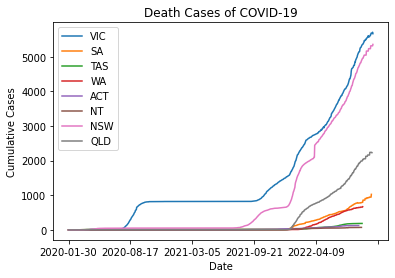

In [63]:
au[au["State"] == "Victoria"].groupby("date")["deaths"].sum().plot()
au[au["State"] == "South Australia"].groupby("date")["deaths"].sum().plot()
au[au["State"] == "Tasmania"].groupby("date")["deaths"].sum().plot()
au[au["State"] == "Western Australia"].groupby("date")["deaths"].sum().plot()
au[au["State"] == "Australian Capital Territory"].groupby("date")["deaths"].sum().plot()
au[au["State"] == "Northern Territory"].groupby("date")["deaths"].sum().plot()
au[au["State"] == "New South Wales"].groupby("date")["deaths"].sum().plot()
au[au["State"] == "Queensland"].groupby("date")["deaths"].sum().plot()
plt.legend(["VIC", "SA", "TAS", "WA", "ACT", "NT", "NSW", "QLD"]);
plt.xlabel("Date")
plt.ylabel("Cumulative Cases")
plt.title("Death Cases of COVID-19")

Berikut merupakan total jumlah data yang direkam oleh masing-masing elemen pada State.

In [ ]:
au["State"].value_counts().head(10)

New South Wales                 984
Victoria                        984
Queensland                      981
South Australia                 979
Western Australia               951
Tasmania                        949
Northern Territory              947
Australian Capital Territory    938
From Diamond Princess            30
External territories              1
Name: province_state, dtype: int64

##Conclusion, Assumptions, Overall Analysis

Berikut merupakan poin-poin analisis keseluruhan 

*   Setelah kasus COVID-19 pertama tercatat di Australia, pencatatan terus dilakukan. Banyaknya angka terkonfirmasi dapat menunjukkan bahwa langkah-langkah *tracing* dan *testing* dilakukan secara masif.

*   Kombinasi antara penutupan batas internasional dengan *lockdown* dapat menekan pertumbuhan kasus aktif dan kematian akibat COVID-19. 

*   Adanya gelombang outbreak baik secara lokal maupun karena varian baru dari COVID-19 tetap memiliki peran yang signifikan dalam peningkatan kasus COVID-19.


*   Setelah sebagian besar penduduk telah divaksin dan COVID-19 sudah lebih terkendali, perbatasan dibuka dan *lockdown* tidak lagi diberlakukan. Pencatatan kasus aktif dan kesembuhan juga berhenti. 


*   Victoria dan New South Wales, Queensland, dan South Australia adalah negara bagian dengan angka kematian tertinggi akibat COVID-19 dengan lebih dari 5000 kasus. Keduanya memiliki kota-kota  besar dengan kepadatan penduduk tertinggi di Australia.



 




###**Referensi**

Burke, Kelly (19 March 2020). "Australia closes borders to stop coronavirus". Seven News. Archived from the original on 19 March 2020 [Archived]. Retrieved 9 October 2022.

Butt, Craig (27 October 2020). "Ten graphs that show the rise and fall of Victoria's COVID-19-second wave". The Age. Retrieved  9 October 2022.

Dye, Josh; Clun, Rachel (21 February 2021). "COVID-19 vaccines begin as Prime Minister receives Pfizer immunisation". The Sydney Morning Herald. Retrieved 10 October 2022.

Knaus, Christopher (7 February 2022). "Australia to reopen international border on 21 February". The Guardian. Retrieved 9 October 2022.

Pearlman, Jonathan (29 June 2021). "Almost half of Aussie population under lockdown". The Straits Times. Retrieved 10 October 2022.

Ben Westcott and Caitlin McGee (15 December 2021). "Australia moves to lift Covid-19 restrictions amid surge in Omicron infections". CNN. Retrieved 10 October 2022.